In [17]:
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories,shuffle = True, random_state = 0,remove=('headers','footers'))
comp_class = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware']
rec_class = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

In [ ]:
####Question 4
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

WordCount = count_vec.fit_transform(dataset.data)
WordCount_tf = tfidf_tranformer.fit_transform(WordCount)
WordCount_array = WordCount_tf.toarray()
dataset = pd.DataFrame(data=WordCount_array, columns = count_vec.get_feature_names())

svd_t = TruncatedSVD(n_components=1000, random_state=42)
svd_t.fit(word_counts)

x_axis = np.linspace(1, 1000, 1000)
y_axis = np.cumsum(svd_t.explained_variance_ratio_)

plt.plot(x_axis, y_axis)
plt.title('Percentage of Variance retained by the top r Principal Components')
plt.ylabel('Percentage of Variance')
plt.xlabel(' Components')

In [22]:
#########Question 5
#get the list of r componets
r_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
SVD_results = defaultdict(list)
NMF_results = defaultdict(list)
best_svd = 0
best_nmf = 0
best_svd_r = 0
best_nmf_r = 0
#For the r components find 5 measures scores
for r in r_:
    print('n_componets: ' + str(r))
    model_svd = TruncatedSVD(n_components=r)
    SVD_data = model_svd.fit_transform(dataset)
    kmean = KMeans(n_clusters=2, random_state=0)
    kmean.fit(SVD_data)
    Y_result = [i // 4 for i in dataset.target]
    SVD_results["Homogeneity"].append(metrics.homogeneity_score(Y_result, kmean.labels_))
    SVD_results["Completeness"].append(metrics.completeness_score(Y_result, kmean.labels_))
    SVD_results["V-measure"].append(metrics.v_measure_score(+.labels_))
    SVD_results["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(Y_result, kmean.labels_))
    SVD_results["Adjusted_mutual_info_score"].append(adjusted_mutual_info_score(Y_result, kmean.labels_))
   #find the average svd score
    average_svd_score = (SVD_results["Homogeneity"][-1] + SVD_results["Completeness"][-1] \
    + SVD_results["V-measure"][-1] + SVD_results["Adjusted Rand-Index"][-1]  \
    + SVD_results["Adjusted_mutual_info_score"][-1]) / 5.0
#Find the best svd
    if(average_svd_score > best_svd):
        best_svd = average_svd_score
        best_svd_r = r
        best_svd_kmeans = kmean
        best_svd_data = SVD_data
#NMF part
    model_nmf = NMF(n_components=r)
    NMF_data = model_nmf.fit_transform(dataset)
    kmean = KMeans(n_clusters=2, random_state=0)
    kmean.fit(NMF_data)

    NMF_results["Homogeneity"].append(metrics.homogeneity_score(Y_result, kmean.labels_))
    NMF_results["Completeness"].append(metrics.completeness_score(Y_result, kmean.labels_))
    NMF_results["V-measure"].append(metrics.v_measure_score(Y_result, kmean.labels_))
    NMF_results["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(Y_result, kmean.labels_))
    NMF_results["Adjusted_mutual_info_score"].append(adjusted_mutual_info_score(Y_result, kmean.labels_))

    average_nmf_score = (NMF_results["Homogeneity"][-1] + NMF_results["Completeness"][-1] \
    + NMF_results["V-measure"][-1] + NMF_results["Adjusted Rand-Index"][-1]  \
    + NMF_results["Adjusted_mutual_info_score"][-1]) / 5.0
    
#find the best NMF
    if(average_nmf_score > best_nmf):
        best_nmf = average_nmf_score 
        best_nmf_r = r
        best_nmf_kmeans = kmean
        best_nmf_data = NMF_data


print(f"best r for svd is {best_svd_r}, the average score is: {best_svd:.3f}")
print(f"best r for nmf is {best_nmf_r}, the average score is: {best_nmf:.3f}")

n_componets: 1


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 2


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 3


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 4


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 5


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_componets: 6


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 7


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 8


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 9


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 10


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 20


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 50


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


n_componets: 100


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


n_componets: 300


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


best r for svd is 50, the average score is: 0.594
best r for nmf is 2, the average score is: 0.614


In [23]:
def hist_measure(results, r_, model_name):
    results_df = pd.DataFrame(
      data = results,
      index = r_
  )

    results_df.plot(
      kind = 'bar',
      title = "{}: Measure Scores Based on Different Ks".format(model_name), 
      xlabel = "Different Ks",
      ylabel = "Measurement Score",
      figsize = (12, 7)
  )

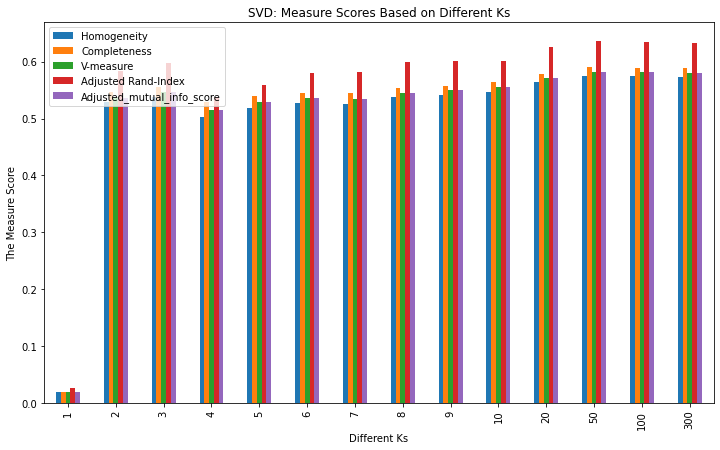

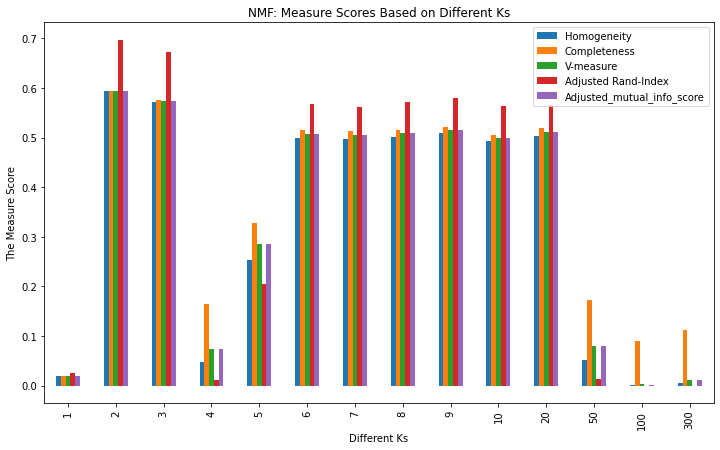

In [24]:
hist_measure(SVD_results, r_, "SVD")
hist_measure(NMF_results, r_, "NMF")

In [37]:
#############Question 8
#plot the k-means clusters
def kmeans_clusters(kmean, data, truth, model_name):

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    predicted_labels = km.labels_
    if np.mean(kmean.labels_ == truth) > 0.5:
        predicted_labels = kmean.labels_
    else:
        predicted_labels = [1-x for x in km.labels_]
    ax1.scatter(
      x = data[: ,0],
      y = data[: ,1],
      c = predicted_labels, 
  )
    ax1.set_title("Prediction")
    ax2.scatter(
      x = data[: ,0],
      y = data[: ,1],
  )
    ax2.set_title("Ground Truth")
    fig.suptitle("Best {} Visualization".format(model_name))
    plt.show()

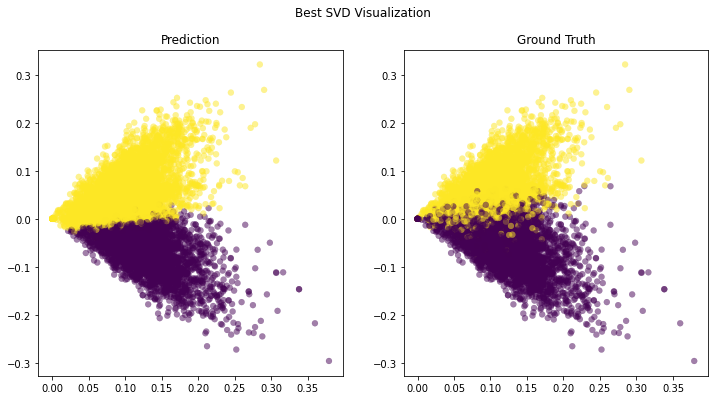

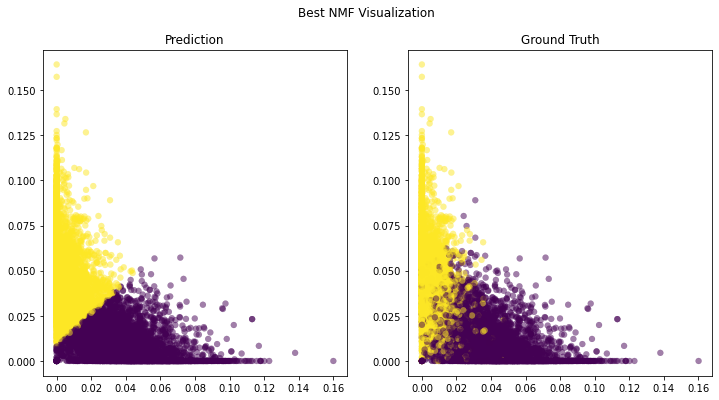

In [38]:
#draw the scatter plot for best_svd
kmeans_clusters(best_svd_kmeans, best_svd_data, Y_result, "SVD")
#draw the scatter plot for best_nmf
kmeans_clusters(best_nmf_kmeans, best_nmf_data, Y_result, "NMF")

In [52]:
################################Question 10
data_vec = count_vectorizer.fit_transform(dataset.data)
print(f"samples: {data_vec .shape[0]}, n_features: {data_vec.shape[1]}")
dataset = tfidf_tranformer.fit_transform(data_vec)
print('shape of matrix:', dataset.shape)
#For 20 categirues construct contigency matrix
kmeans20_ = KMeans(n_clusters=20, random_state=0)
kmeans20_.fit(dataset)
evaluate(kmeans20_, dataset, Y_result, name="KMeans\non tf-idf vectors")

n_samples: 18846, n_features: 45365
data tf-idf matrix shape: (18846, 45365)
clustering done in 0.00 ± 0.00 s 
Homogeneity: 0.357 ± 0.000
Completeness: 0.222 ± 0.000
V-measure: 0.274 ± 0.000
Adjusted Rand-Index: 0.097 ± 0.000
Adjusted_mutual_info_score: 0.273 ± 0.000


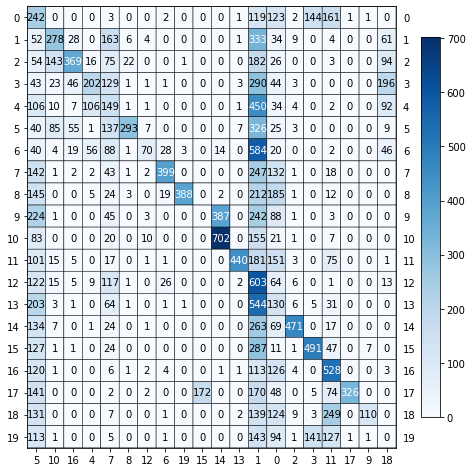

In [53]:
k20_svd = KMeans(n_clusters=20, random_state=0)
svd_t = TruncatedSVD(n_components=best_svd_r, random_state=42)
data_svd = svd_t.fit_transform(dataset)
k20_svd.fit(data_svd)
cm = confusion_matrix(dataset.target, k20_svd.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows)

In [54]:
evaluate(k20_svd, dataset, Y_result, name="KMeans\non tf-idf vectors")

clustering done in 0.00 ± 0.00 s 
Homogeneity: 0.319 ± 0.000
Completeness: 0.206 ± 0.000
V-measure: 0.251 ± 0.000
Adjusted Rand-Index: 0.083 ± 0.000
Adjusted_mutual_info_score: 0.250 ± 0.000


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


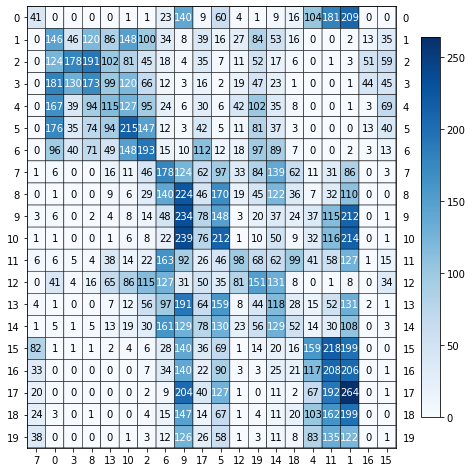

In [55]:
kmeans20_nmf = KMeans(n_clusters=20, random_state=0)
nmf_t = NMF(n_components=best_nmf_r, random_state=42)
data_nmf = nmf_t.fit_transform(dataset)
kmeans20_nmf.fit(data_nmf)

cm = confusion_matrix(dataset.target, kmeans20_nmf.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows)

In [56]:
evaluate(kmeans20_nmf, dataset, Y_result, name="KMeans\non tf-idf vectors")

clustering done in 0.00 ± 0.00 s 
Homogeneity: 0.194 ± 0.000
Completeness: 0.110 ± 0.000
V-measure: 0.141 ± 0.000
Adjusted Rand-Index: 0.054 ± 0.000
Adjusted_mutual_info_score: 0.140 ± 0.000
